In [152]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [153]:
df = pd.read_csv('dataset/Titanic-Dataset.csv')
df.head()
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [154]:
df['Pclass'].unique().size

3

In [155]:
print(df['Ticket'].unique().size) #There are some duplicated tickets; Maybe for people in same room. Maybe staying in the room with multiple people has influence
df['Ticket'].value_counts()

681


Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [180]:
df['Cabin'].value_counts() #Same as for ticket

Cabin
147    687
145      4
63       4
47       4
141      3
      ... 
119      1
6        1
70       1
30       1
60       1
Name: count, Length: 148, dtype: int64

In [157]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [158]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [159]:
df = df.drop(columns=['PassengerId', 'Name'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
from sklearn.preprocessing import LabelEncoder

In [161]:
categorical_cols = ['Sex', 'Ticket', 'Cabin', 'Embarked']
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,523,7.2500,147,2
1,1,1,0,38.0,1,0,596,71.2833,81,0
2,1,3,0,26.0,0,0,669,7.9250,147,2
3,1,1,0,35.0,1,0,49,53.1000,55,2
4,0,3,1,35.0,0,0,472,8.0500,147,2


In [162]:
import seaborn as sns

Survived correlation with:

Survived:, 100.00%
Pclass:, -33.85%
Sex:, -54.34%
Age:, -7.72%
SibSp:, -3.53%
Parch:, 8.16%
Ticket:, -16.45%
Fare:, 25.73%
Cabin:, -25.49%
Embarked:, -16.35%


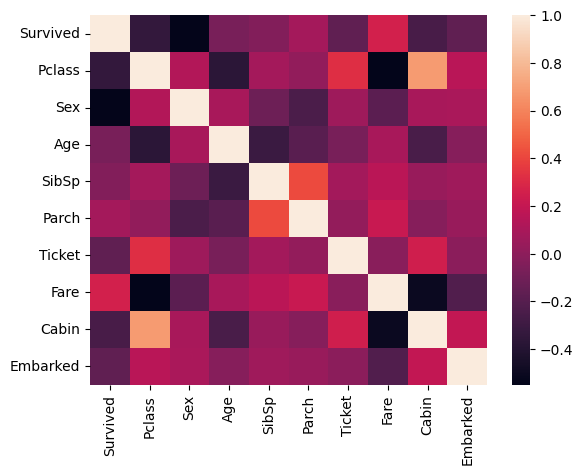

In [163]:
sns.heatmap(df.corr())
print("Survived correlation with:\n")
for col in df.columns:
    print(f"{col}:, {(df.corr()['Survived'][col] * 100):.2f}%")

# The lower (better) the class, the higher the chances
# Women have much greater chance than men
# Younger have bigger changes (but the corr is not that impressive)
# Bigger parch, greater the chance (not that big corr). So having parents/children increase your change
# Bigger the fare, greater chances
# Ticket, Cabin and Embarked are irrelevant in our corr due to their label encoding; BUT embarked might actually matter due to only 3 encoding vals

In [164]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [165]:
df['Age'].describe()
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [166]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'])
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(668, 9)
(223, 9)
(668,)
(223,)


In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
Y_pred = logistic_regression.predict(X_test)

In [179]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [178]:
print(f"Accuracy:            {accuracy_score(Y_test, Y_pred):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print(f"\nPrecision (Micro):   {precision_score(Y_test, Y_pred, average='micro'):.4f}")
print(f"Precision (Macro):   {precision_score(Y_test, Y_pred, average='macro'):.4f}")

print(f"\nRecall (Micro):      {recall_score(Y_test, Y_pred, average='micro'):.4f}")
print(f"Recall (Macro):      {recall_score(Y_test, Y_pred, average='macro'):.4f}")

Accuracy:            0.7982

Confusion Matrix:
[[117  16]
 [ 29  61]]

Precision (Micro):   0.7982
Precision (Macro):   0.7968

Recall (Micro):      0.7982
Recall (Macro):      0.7787
